In [1]:
import pandas as pd
import numpy as np
#Stack 함수를 이용해서 쌓는 것 공부

In [2]:
mul_index = pd.MultiIndex.from_tuples([('cust_1', '2020'), ('cust_1', '2021'),

   ('cust_2', '2020'), ('cust_2', '2021')])  



data = pd.DataFrame(data=np.arange(16).reshape(4, 4),

   index=mul_index,

   columns=['prd_1', 'prd_2', 'prd_3', 'prd_4'],

   dtype='int')

In [3]:
mul_index

MultiIndex([('cust_1', '2020'),
            ('cust_1', '2021'),
            ('cust_2', '2020'),
            ('cust_2', '2021')],
           )

In [4]:
data

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

In [6]:
#Stack으로 쌓기
dataStacked= data.stack()
dataStacked

cust_1  2020  prd_1     0
              prd_2     1
              prd_3     2
              prd_4     3
        2021  prd_1     4
              prd_2     5
              prd_3     6
              prd_4     7
cust_2  2020  prd_1     8
              prd_2     9
              prd_3    10
              prd_4    11
        2021  prd_1    12
              prd_2    13
              prd_3    14
              prd_4    15
dtype: int32

In [7]:
dataStacked['cust_2'] #세부적인 데이터 추출 가능

2020  prd_1     8
      prd_2     9
      prd_3    10
      prd_4    11
2021  prd_1    12
      prd_2    13
      prd_3    14
      prd_4    15
dtype: int32

In [8]:
dataStacked['cust_2']['2020']

prd_1     8
prd_2     9
prd_3    10
prd_4    11
dtype: int32

In [9]:
dataStacked['cust_2']['2020']['prd_1']

8

In [11]:
dataStacked['cust_2']['2020'][['prd_1','prd_2']]

prd_1    8
prd_2    9
dtype: int32

In [12]:
dataStacked.index

MultiIndex([('cust_1', '2020', 'prd_1'),
            ('cust_1', '2020', 'prd_2'),
            ('cust_1', '2020', 'prd_3'),
            ('cust_1', '2020', 'prd_4'),
            ('cust_1', '2021', 'prd_1'),
            ('cust_1', '2021', 'prd_2'),
            ('cust_1', '2021', 'prd_3'),
            ('cust_1', '2021', 'prd_4'),
            ('cust_2', '2020', 'prd_1'),
            ('cust_2', '2020', 'prd_2'),
            ('cust_2', '2020', 'prd_3'),
            ('cust_2', '2020', 'prd_4'),
            ('cust_2', '2021', 'prd_1'),
            ('cust_2', '2021', 'prd_2'),
            ('cust_2', '2021', 'prd_3'),
            ('cust_2', '2021', 'prd_4')],
           )

In [18]:
#데이터에 결측값 존재시 어떻게 되는지 확인
data.ix['cust_2', 'prd_3'] =np.nan
data


prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1    2.0      3
       2021      4      5    6.0      7
cust_2 2020      8      9    NaN     11
       2021     12     13    NaN     15

In [16]:
import warnings
warnings.filterwarnings(action='ignore')

In [20]:
data.stack(dropna=True) #default: dropna=True # 결과값이 바뀌지 않았다.
data.stack(dropna=False) #dropna=False 되야 결과값이 바뀐다.
#level 왼쪽에서부터 0번, 1번, 2번, 3번

cust_1  2020  prd_1     0.0
              prd_2     1.0
              prd_3     2.0
              prd_4     3.0
        2021  prd_1     4.0
              prd_2     5.0
              prd_3     6.0
              prd_4     7.0
cust_2  2020  prd_1     8.0
              prd_2     9.0
              prd_3     NaN
              prd_4    11.0
        2021  prd_1    12.0
              prd_2    13.0
              prd_3     NaN
              prd_4    15.0
dtype: float64

In [21]:
dataStacked.unstack() 
#level 왼쪽에서부터 0번, 1번, 2번, 3번


prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

In [22]:
dataStacked.unstack(level=0) 
#맨 왼쪽에 있던 열 index가 위로 갔다.

cust_1  cust_2
2020 prd_1       0       8
     prd_2       1       9
     prd_3       2      10
     prd_4       3      11
2021 prd_1       4      12
     prd_2       5      13
     prd_3       6      14
     prd_4       7      15

In [23]:
dataStacked.unstack(level=1) 
#level=1에 있던 index가 위로 간다

2020  2021
cust_1 prd_1     0     4
       prd_2     1     5
       prd_3     2     6
       prd_4     3     7
cust_2 prd_1     8    12
       prd_2     9    13
       prd_3    10    14
       prd_4    11    15

In [24]:
dataStacked.unstack(level=2) 
#level=2랑 unstack() default랑 같다. 맨 오른쪽 끝의 열이 위로 간다.

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

In [25]:
dataStacked.unstack(level=-1) #리스트 참조랑 비슷하다.

prd_1  prd_2  prd_3  prd_4
cust_1 2020      0      1      2      3
       2021      4      5      6      7
cust_2 2020      8      9     10     11
       2021     12     13     14     15

In [26]:
dataStacked.unstack(level=-2) 

2020  2021
cust_1 prd_1     0     4
       prd_2     1     5
       prd_3     2     6
       prd_4     3     7
cust_2 prd_1     8    12
       prd_2     9    13
       prd_3    10    14
       prd_4    11    15

In [ ]:
"""
*데이터를 요약하는 함수 5가지
pivot.pivot_table
melt
stack, unstack
wide_to_ling
crosstab()

"""

In [29]:
data_wide = pd.DataFrame({"C1prd1" : {0 : "a", 1 : "b", 2 : "c"},

   "C1prd2" : {0 : "d", 1 : "e", 2 : "f"},

   "C2prd1" : {0 : 2.5, 1 : 1.2, 2 : .7},

   "C2prd2" : {0 : 3.2, 1 : 1.3, 2 : .1},

   "value" : dict(zip(range(3), np.random.randn(3)))

   })
#딕셔너리 안에 딕셔너리 존재. '중첩 딕셔너리' 라고 부른다.
#딕셔너리를 나타낼때, dict 함수를 사용가능하다.
data_wide

,C1prd1,C1prd2,C2prd1,C2prd2,value
0,a,d,2.5,3.2,0.035664
1,b,e,1.2,1.3,-0.318431
2,c,f,0.7,0.1,-0.674868


In [31]:
zip(range(3), np.random.randn(3))

In [33]:
for i,x in zip(range(3), np.random.randn(3)):
    print(i,x)
#zip 함수로 인덱스(키)랑 value로 묶인다. 

0 -0.1339215251207235
1 2.028944391517095
2 1.4902743320057728


In [47]:
data_wide["seq_no"]=data_wide.index
data_wide
pd.wide_to_long(data_wide, ["C1prd","C2prd"], i="seq_no", j="prd", suffix="\d")

,,value,C1prd,C2prd
seq_no,prd,,,
0,1,0.035664,a,2.5
1,1,-0.318431,b,1.2
2,1,-0.674868,c,0.7
0,2,0.035664,d,3.2
1,2,-0.318431,e,1.3
2,2,-0.674868,f,0.1


In [38]:
data_wide.index

Int64Index([0, 1, 2], dtype='int64')

In [44]:
dft = pd.DataFrame({"A1970": {0: "a", 1: "b", 2: "c"},
     "A1980": {0: "d", 1: "e", 2: "f"},
     "B1970": {0: 2.5, 1: 1.2, 2: .7},
     "B1980": {0: 3.2, 1: 1.3, 2: .1},
     "X": dict(zip(range(3), np.random.randn(3)))
                    })

In [48]:
dft["id"] = dft.index

In [49]:
dft

,A1970,A1980,B1970,B1980,X,id
0,a,d,2.5,3.2,2.357771,0
1,b,e,1.2,1.3,0.481420,1
2,c,f,0.7,0.1,-1.271142,2


In [50]:
pd.wide_to_long(dft, ["A", "B"], i="id", j="year")

,,X,A,B
id,year,,,
0,1970,2.357771,a,2.5
1,1970,0.481420,b,1.2
2,1970,-1.271142,c,0.7
0,1980,2.357771,d,3.2
1,1980,0.481420,e,1.3
2,1980,-1.271142,f,0.1


In [52]:
data=pd.DataFrame({
    'id':['id1','id1','id1','id2','id2','id3'],
    'f1':['a','a','a','b','b','b',],
    'f2':['d','d','d','c','c','d',]
    
})
data

,id,f1,f2
0,id1,a,d
1,id1,a,d
2,id1,a,d
3,id2,b,c
4,id2,b,c
5,id3,b,d


In [55]:
pd.crosstab(data.f1, data.f2) #요약하는 함수 crosstable -> crosstab()
#            (인덱스, 컬럼)



f2,c,d
f1,,
a,0,3
b,2,1


In [58]:
train=pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
train.describe() #기술 통계
#각 열에 따라 수치

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [60]:
#성별에 따른 생존율?
#groupby('원하는 분류')를 사용해서 나타내기
train.groupby('Sex') #DataFrame

In [62]:
train.groupby('Sex')['Survived'] #Series

In [63]:
train.groupby('Sex')['Survived'].mean() #각 그룹들의 평균 추출
# groupby('그룹화 기준 컬럼')['열'].함수()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [64]:
train.groupby('Sex')[['Survived']]#DataFrame #대괄호 2개면 데이터프레임. 2차원.

In [66]:
train.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [69]:

#pivot_table 함수로 동일한 결과
#pd.pivot_table(data, index='cust_id', columns='prod_cd', values='pch_amt', aggfunc=np.mean)

pd.pivot_table(train, index='Sex', columns='Survived',aggfunc=np.mean)

Age                  Fare                Parch            \
Survived          0          1          0          1         0         1   
Sex                                                                        
female    25.046875  28.847716  23.024385  51.938573  1.037037  0.515021   
male      31.618056  27.276022  21.960993  40.821484  0.207265  0.357798   

         PassengerId                Pclass               SibSp            
Survived           0           1         0         1         0         1  
Sex                                                                       
female    434.851852  429.699571  2.851852  1.918455  1.209877  0.515021  
male      449.121795  475.724771  2.476496  2.018349  0.440171  0.385321

In [70]:
pd.pivot_table(train, index='Survived', columns='Sex',aggfunc=np.mean)

Age                  Fare                Parch            \
Sex          female       male     female       male    female      male   
Survived                                                                   
0         25.046875  31.618056  23.024385  21.960993  1.037037  0.207265   
1         28.847716  27.276022  51.938573  40.821484  0.515021  0.357798   

         PassengerId                Pclass               SibSp            
Sex           female        male    female      male    female      male  
Survived                                                                  
0         434.851852  449.121795  2.851852  2.476496  1.209877  0.440171  
1         429.699571  475.724771  1.918455  2.018349  0.515021  0.385321

In [71]:
#pivot_table 함수로 동일한 결과
#pd.pivot_table(데이터, index=  , columns=  , values=   , aggfunc= ) #default: aggfunc= np.mean
pd.pivot_table(train, index='Sex', values='Survived',aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [72]:
train.pivot_table(index='Sex', values='Survived',aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [73]:
train.pivot_table(index=['Sex']) #aggfunc =np.mean
#자동으로 성별에 따른 모든 열들의 평균이 추출


,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [75]:
#describe
#성별로 구분(groupby), 생존 여부(Survived) 컬럼에 대해 describe함수 적용.
#train.groupby('Sex')[['Survived']]#그룹화된 객체
#train.groupby('Sex')[['Survived']].mean() #성별, 생존률 평균
train.groupby('Sex')[['Survived']].describe()

Survived                                             
          count      mean       std  min  25%  50%  75%  max
Sex                                                         
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0
male      577.0  0.188908  0.391775  0.0  0.0  0.0  0.0  1.0

In [76]:
train.groupby('Sex')[['Survived']].mean() 

,Survived
Sex,
female,0.742038
male,0.188908


In [78]:
train.pivot_table(index='Sex', values='Survived', aggfunc=np.mean)

,Survived
Sex,
female,0.742038
male,0.188908


In [82]:
#성별, 선실등급별 생존률
train.groupby('Sex')[['Pclass']].describe()


Pclass                                            
        count      mean      std  min  25%  50%  75%  max
Sex                                                      
female  314.0  2.159236  0.85729  1.0  1.0  2.0  3.0  3.0
male    577.0  2.389948  0.81358  1.0  2.0  3.0  3.0  3.0

In [81]:
train.groupby('Sex')[['Pclass']].mean()

,Pclass
Sex,
female,2.159236
male,2.389948


In [79]:
#성별, 선실등급별 생존률
train.pivot_table(index=['Sex','Pclass'], values='Survived', aggfunc=np.mean)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [83]:
#동일한 결과(변수를 쓰지 않았을 경우)
train.pivot_table("Survived",['Sex','Pclass'], aggfunc=np.mean)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [89]:
#train.info()
(train.Sex=="female") & (train.Age >0) & (train.Embarked)

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889    False
890    False
Length: 891, dtype: bool

In [100]:
train['Survived2']=(train.Sex=="female") & (train.Age >0) & (train.Embarked)
train
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Survived2        0
dtype: int64

In [98]:
train['Survived2'].value_counts()

False    632
True     259
Name: Survived2, dtype: int64

In [101]:
train['Survived2']=train['Survived2'].astype(int)
train['Survived2']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    0
890    0
Name: Survived2, Length: 891, dtype: int32

In [102]:
from plotnine import *
#R ggplot2 -> 파이썬에서 사용 가능 -> plotnine 설치하면 ggplot2 사용가능.


In [103]:
import missingno as msno
#missingno:누락값 시각화 패키지


In [104]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived2'],
      dtype='object')

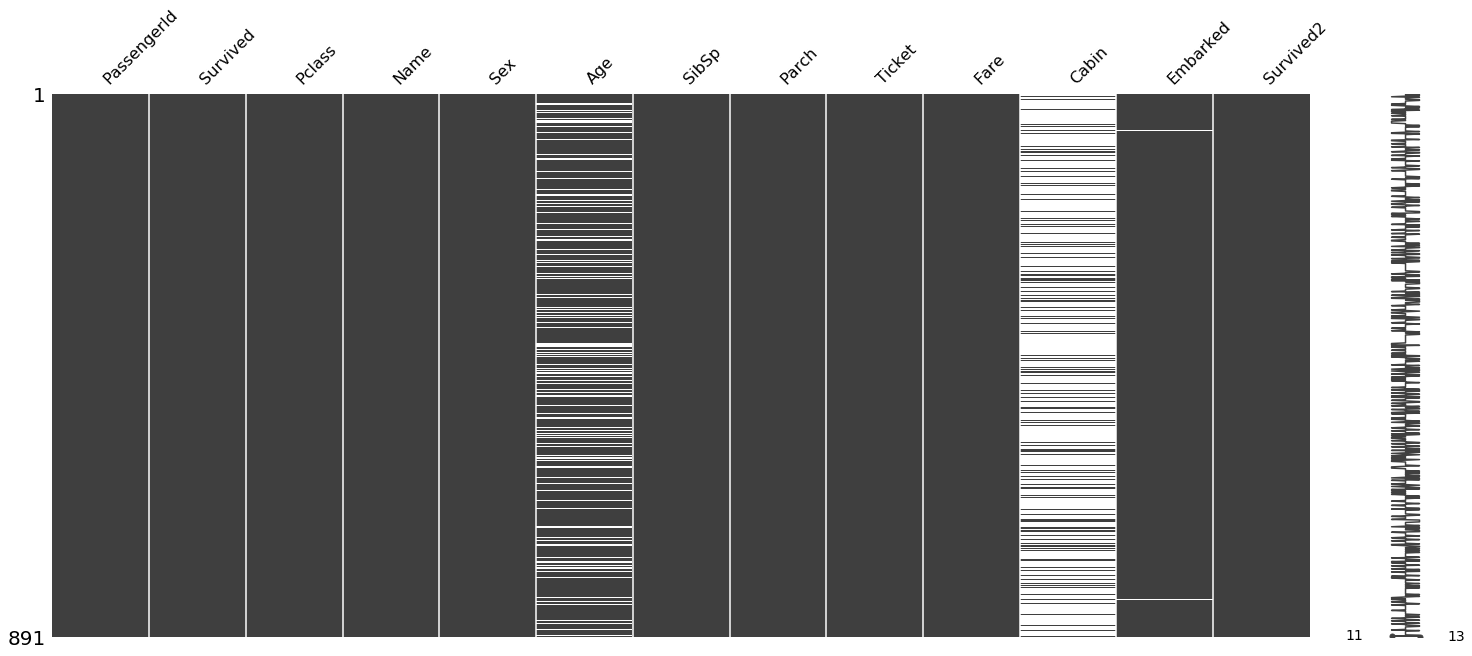

In [105]:
#우리가 배워운것 결측값 찾는 방법, isnull.sum() / info()
#이젠 missingno 사용
msno.matrix(train) #시각화 

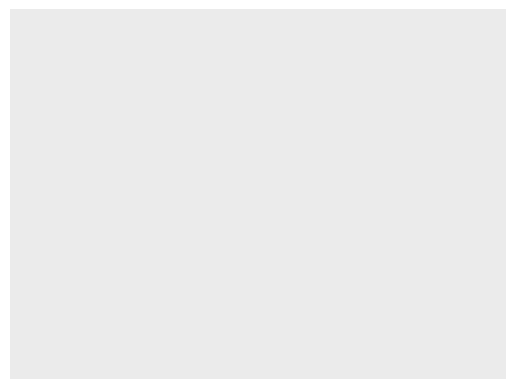

<ggplot: (-9223371913443061224)>

In [106]:
(ggplot(train)) # 큰 여백

In [110]:
# 경고 미출력 및 한글 안깨지는 코드
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

import warnings
warnings.filterwarnings("ignore")


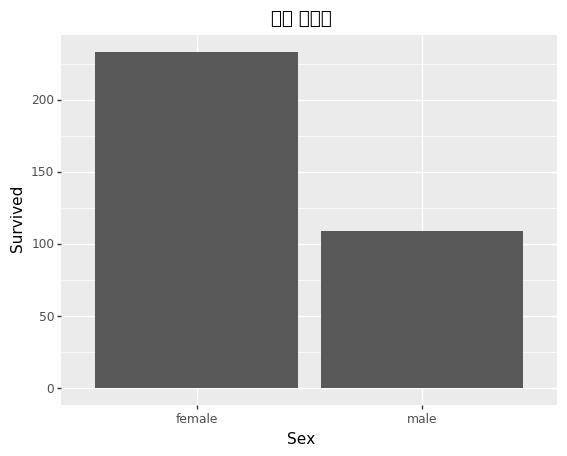

<ggplot: (-9223371913439595944)>

In [111]:
(ggplot(train)
+ aes(x="Sex", y="Survived")
+ geom_col() # col 바 
 +ggtitle("성별 생존률") #제목 #한글 깨진다. 
)

In [199]:
#============ 타이타닉 데이터 분석 ============

train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv") 
train.shape # (891.12)
test.shape #(418,11)
train.head()
test.head()
train.describe()
test.describe()
test.info()
print(test.info())
train
test
#파생변수: drived. ex) SibSp + Parch => Family로 볼수도 있다.
#train data 랑 test data랑 똑같이 만들어 줘야 한다. 똑같이 전처리 해줘야 한다. 
#우리가 사용하려고 하는 모든 변수, 데이터는 train과 test랑 같아야 한다.
#결측값도 어떻게 처리할지, Train과 Test랑 다른거 확인. 부족한 부분들 만들어 줘야한다. 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null objec

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [200]:
test['Survived']=(test.Sex=='female') & (test.Embarked) & (test.Age>0)
test.head()
test.isnull().sum()
test['Survived'].value_counts()

False    291
True     127
Name: Survived, dtype: int64

In [147]:
submission=test[['PassengerId','Survived']]
submission.head()
submission['Survived']=submission['Survived'].astype(int)
submission.head()
submission.to_csv("submission.csv", index=False)

In [ ]:
#Kaggle Accuracy

# Accuracy = (TP+TN)/(TP+TN+FP+FN)

# where: TP = True positive; FP = False positive; TN = True negative; FN = False negative

# The formula for quantifying binary precision is: Precision = (TP) / (TP+FP)

In [124]:
test.Embarked

0      Q
1      S
2      Q
3      S
4      S
      ..
413    S
414    C
415    S
416    S
417    C
Name: Embarked, Length: 418, dtype: object

In [126]:
test.Age

0      34.5
1      47.0
2      62.0
3      27.0
4      22.0
       ... 
413     NaN
414    39.0
415    38.5
416     NaN
417     NaN
Name: Age, Length: 418, dtype: float64

In [ ]:
#범주형데이터 ->원핫인코딩
#혈액형:A,B,A,AB,0,0
# A:1000
# B:0100
# AB:0010
# 0:0001



In [148]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [157]:
obj_df=train.select_dtypes(include=['object']) #type별로 추출 가능
#select_dtype 함수 type별로 추출 가능
obj_df

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [152]:
obj_df['Name'].isnull().sum()

0

In [158]:
obj_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Name        891 non-null object
Sex         891 non-null object
Ticket      891 non-null object
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: object(5)
memory usage: 34.9+ KB


In [161]:
#단 하나의 열이라도 Nan있으면 모두 추출, 행 전체 추출
obj_df.isnull() # null 확인


,Name,Sex,Ticket,Cabin,Embarked
0,False,False,False,True,False
1,False,False,False,False,False
2,False,False,False,True,False
3,False,False,False,False,False
4,False,False,False,True,False
...,...,...,...,...,...
886,False,False,False,True,False
887,False,False,False,False,False
888,False,False,False,True,False
889,False,False,False,False,False


In [162]:
obj_df.isnull().any(axis=0) #단 하나라도 Null이 나오면 True, default: axis=0 열 기준

Name        False
Sex         False
Ticket      False
Cabin        True
Embarked     True
dtype: bool

In [163]:
obj_df.isnull().any(axis=1) #행 기준

0       True
1      False
2       True
3      False
4       True
       ...  
886     True
887    False
888     True
889    False
890     True
Length: 891, dtype: bool

In [164]:
##단 하나의 열이라도 Nan있으면 모두 추출, 행 5개 추출
obj_df[obj_df.isnull().any(axis=1)].head(5)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
5,"Moran, Mr. James",male,330877,NaN,Q
7,"Palsson, Master. Gosta Leonard",male,349909,NaN,S


In [165]:
###단 하나의 열이라도 Nan있으면 모두 추출, 행 전체 추출
obj_df[obj_df.isnull().any(axis=1)]

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
5,"Moran, Mr. James",male,330877,NaN,Q
7,"Palsson, Master. Gosta Leonard",male,349909,NaN,S
...,...,...,...,...,...
884,"Sutehall, Mr. Henry Jr",male,SOTON/OQ 392076,NaN,S
885,"Rice, Mrs. William (Margaret Norton)",female,382652,NaN,Q
886,"Montvila, Rev. Juozas",male,211536,NaN,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S


In [169]:
obj_df['Cabin']


0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [168]:
obj_df['Cabin'].value_counts() #종류 확인 가능.
#데이터 분석시 domain knowledge도 필요함

C23 C25 C27    4
G6             4
B96 B98        4
D              3
E101           3
              ..
A24            1
D11            1
C118           1
C148           1
C128           1
Name: Cabin, Length: 147, dtype: int64

In [170]:
obj_df['Cabin'].value_counts().sum()

204

In [201]:
# train[train['Sex']=='male']['Sex'] = 0 # Series를 통채로 넣어서 바꿀수는 없음

train.loc[train['Sex']=='male', "Sex"] = 0
train.loc[train['Sex']=='female', "Sex"] = 1
train.Sex

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [203]:
trainCopy=train.copy()
testCopy=test.copy()

In [202]:
test.loc[test['Sex']=='male', "Sex"] = 0
test.loc[test['Sex']=='female', "Sex"] = 1
test.Sex

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [204]:
from sklearn.preprocessing import LabelEncoder

In [230]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
trainCopy=train.copy()#원본 데이터 훼손 방지하기 위해
testCopy=test.copy()



In [231]:
#방법1
le=LabelEncoder()
le.fit(['male','female'])


train['Sex'] = le.transform(train['Sex'])
train['Sex']
test['Sex'] = le.transform(test['Sex'])
test['Sex']

0      1
1      0
2      1
3      1
4      0
      ..
413    1
414    0
415    1
416    1
417    1
Name: Sex, Length: 418, dtype: int32

In [234]:
#방법 2
def genToInt(data):
    le=LabelEncoder()
    le.fit(["male", "female"])
    data['Sex']=le.transform(data['Sex'])
    return data
trainCopy=genToInt(trainCopy)
testCopy=genToInt(testCopy)

ValueError: y contains previously unseen labels: [0, 1]

In [233]:
# 데이터 복사본 생성
trainCopy = train.copy() 
testCopy = test.copy()

In [235]:
# Sex(남/여), Pclass(1/2/3), Embarked(C/Q/S)
# 10, 100,   
# 01, 010
#   , 001
dummy_columns=["Sex", "Pclass", "Embarked"]

def myDummy(data, columns):
    for column in columns:
        data=pd.concat([data,pd.get_dummies(data[column], prefix=column)], axis=1)
        data=data.drop(column, axis=1)
    return data
        #print(pd.get_dummies(data[column], prefix=column))
    #data에 모든 열 추가    
    
    #각각의 컬럼값을 원핫인코딩->리턴
#Sex0 Sex1 Pclass1 Pclass2 Pclass3 Embarked_Q
#  1    0    0         1       0
trainDummy=myDummy(train, dummy_columns)
testDummy=myDummy(test, dummy_columns)
print("원핫 인코딩 이전")
print(train.shape)
print(test.shape)
print("원핫 인코딩 이후")
print(trainDummy.shape)
print(testDummy.shape)
trainDummy.head()



원핫 인코딩 이전
(891, 12)
(418, 11)
원핫 인코딩 이후
(891, 17)
(418, 16)


,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,0,0,1


In [ ]:
# 나중 신경망
# 모델= 가중치1*pclass1+가중치2*pclass2+가중치3*pclass3+가중치4*pclass4

# 시그모이드 함수(sigmoid) : 입력을 무조건 (0~1사이)만들어준다.
# ex) x(-8~+8) -> 1/(1+e의 -x승) => 0~1
# if 모델 >0.5 -> 1(생존)
# else => 0 (사망)


In [227]:
#train 데이터에서 승객 id, 이름, 티켓, 캐빈 제거
trainX=trainDummy.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
trainX.info()
testX=trainDummy.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
testX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived      891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_0         891 non-null uint8
Sex_1         891 non-null uint8
Pclass_1      891 non-null uint8
Pclass_2      891 non-null uint8
Pclass_3      891 non-null uint8
Embarked_C    891 non-null uint8
Embarked_Q    891 non-null uint8
Embarked_S    891 non-null uint8
dtypes: float64(2), int64(3), uint8(8)
memory usage: 41.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived      891 non-null int64
Age           714 non-null float64
SibSp         891 non-null int64
Parch         891 non-null int64
Fare          891 non-null float64
Sex_0         891 non-null uint8
Sex_1         891 non-null uint8
Pclass_1      891 non-null uint8
Pclass_2      891 non-null u

In [ ]:
"""
목표:타이타닉 titanic 등수 올리기(왜 하는지,얘기할때 나중에 어떻게 적용할 수 있을지, 사용할수 있는 부분 )
- 조건문 개선
- Name=> Age  결측값(들이 많기 때문에) 처리
Mrs => Mrs 그룹 중앙값
Miss=> Miss 그룹 중앙값
... 대표적인것들만 처리, 나머진 전체 데이터의 중앙값
나머지는 모두 동일하게전체 그룹 평균/중앙값으로 

-FamilySize 컬럼 추가(SibSp+Parch), binnig(구간 나눠서, 대가족, 중가족, 소가족)
(L/M/S)
"""

In [ ]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
trainCopy=train.copy()#원본 데이터 훼손 방지하기 위해
testCopy=test.copy()


In [ ]:
test['Survived']=(test.Sex=='female') & (test.Embarked) & (test.Age>0)
test.head()
test.isnull().sum()
test['Survived'].value_counts()

In [ ]:
submission=test[['PassengerId','Survived']]
submission.head()
submission['Survived']=submission['Survived'].astype(int)
submission.head()
submission.to_csv("submission.csv", index=False)